In [102]:
import os
import numpy as np
import pandas as pd
    #df_mip['LB'] = df_mip['FO'] - df_mip['FO']*df_mip['Gap']

## MIP

In [183]:
names1 = ['n','I','F','J','R1','R2','FO', 'Tempo']
names2 = ['n','I','F','J','R1','R2','Tempo', 'FO']
instances = [str(i) + ".txt" for i in range(8,12)]
instances.sort()
resultados = []
for inst in instances:
    df = pd.read_csv("MIP_batch" + inst, header=None, delimiter='-',  names=names1)
    df = df[df['R2'] == 1.0]
    df.set_index(['I','F','J','n'], inplace=True)
    df.drop(['R1', 'R2'], axis=1, inplace=True)
    df.columns = pd.MultiIndex.from_tuples([('MIP', 'FO'),('MIP','Tempo')])
    
    df_drop = pd.read_csv("Drop_batch" + inst, header=None, delimiter='-', names=names1)
    df_drop = df_drop[df_drop['R2'] == 1.0]
    df_drop.set_index(['I','F','J','n'], inplace=True)
    df_drop.drop(['R1', 'R2'], axis=1, inplace=True)
    df[[('Drop', 'FO'),('Drop', 'Tempo')]] = df_drop[['FO','Tempo']]
 
    
    df_add = pd.read_csv("Add_batch" + inst, header=None, delimiter='-', names=names1)
    df_add = df_add[df_add['R2'] == 1.0]
    df_add.set_index(['I','F','J','n'], inplace=True)
    df_add.drop(['R1', 'R2'], axis=1, inplace=True)
    df[[('Add', 'FO'),('Add', 'Tempo')]] = df_add[['FO','Tempo']]
    
    df_g = pd.read_csv("Gulosa_batch" + inst, header=None, delimiter='-', names=names2)
    df_g = df_g[df_g['R2'] == 1.0]
    df_g.set_index(['I','F','J','n'], inplace=True)
    df_g.drop(['R1', 'R2'], axis=1, inplace=True)
    df[[('Gulosa', 'FO'),('Gulosa', 'Tempo')]] = df_g[['FO','Tempo']]
    
    df_itr = pd.read_csv("H4_batch" + inst, header=None, delimiter='-', names=names2)
    df_itr = df_itr[df_itr['R2'] == 1.0]
    df_itr.set_index(['I','F','J','n'], inplace=True)
    df_itr.drop(['R1', 'R2'], axis=1, inplace=True)
    df[[('Iterativa', 'FO'),('Iterativa', 'Tempo')]] = df_itr[['FO','Tempo']]
    
    df['best'] = df.iloc[:, df.columns.get_level_values(1)=='FO'].min(axis=1)
    df['MIP', 'Gap'] = (df[('MIP', 'FO')] - df['best'])/df['best']
    df['Add', 'Gap'] = (df[('Add', 'FO')] - df['best'])/df['best']
    df['Drop', 'Gap'] = (df[('Drop', 'FO')] - df['best'])/df['best']
    df['Gulosa', 'Gap'] = (df[('Gulosa', 'FO')] - df['best'])/df['best']
    df['Iterativa', 'Gap'] = (df[('Iterativa', 'FO')] - df['best'])/df['best']
    
    df.drop([('MIP', 'FO'),('Add', 'FO'),('Drop', 'FO'),('Gulosa', 'FO'),('Iterativa', 'FO'), ('best')], axis=1, inplace=True)
        
        
    df = df.sort_index()
    df = df[['MIP', 'Add', 'Drop', 'Gulosa', 'Iterativa']]
    resultados.append(df)

print(resultados[4].groupby(['I','F','J']).mean().to_latex(float_format=lambda x: '%.3f' % x))

/home/vtm/.local/lib/python3.6/site-packages/pandas/core/generic.py:3111: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


IndexError: list index out of range

In [ ]:
# arquivos = ["Gulosa_batch" + str(i) + ".txt" for i in range(8,12)]
arquivos.sort()
names = ['n','I','F','J','R1','R2','Tempo','FO']
cols = [('H4', 'Tempo'),('H4', 'FO')]
greedy = []
for idx, arq in enumerate(arquivos[:3]):
    df = pd.read_csv(arq, sep='-', header=None, names=names, index_col=[0,1,2,3,4,5])
    df.sort_index()
    df.columns = pd.MultiIndex.from_tuples(cols)
    df[('')]
    greedy.append(df)

greedy[0]

In [33]:
arquivos = [nome for nome in os.listdir() if nome[:2] == "H4"]
arquivos.sort()
names = ['n','I','F','J','R1','R2','Tempo','FO']
cols = [('H4', 'Tempo'),('H4', 'FO')]
h4_2 = []
for idx, arq in enumerate(arquivos[:1]):
    df = pd.read_csv(arq, sep='-', header=None, names=names, index_col=[0,1,2,3,4,5])
    df.columns = pd.MultiIndex.from_tuples(cols)
    df = df.groupby(['I','F','J','R1','R2']).mean()
    df[[('MIP','Gap'),('MIP','LB'),('MIP','FO'),('MIP','Tempo')]] = mip[idx].groupby(['I','F','J','R1','R2']).mean()[['Gap','LB','FO','Tempo']]
    df['H4','Gap'] = (df['H4','FO'] - df['MIP','LB'])/df['MIP','LB']
    df = df.sort_index(axis=1)
    h4_2.append(df)

h4_2[0]

H4                             MIP            \
                           FO       Gap      Tempo         FO       Gap   
I  F   J   R1  R2                                                         
3  4   5   1.5 1.5   3549.508  0.000973   0.002080   3546.058  0.000000   
   5   10  1.5 1.5   5378.484  0.000943   0.004276   5373.416  0.000000   
10 50  100 3.0 1.5  24008.600  0.034245   0.691673  23213.640  0.000000   
25 50  150 3.0 1.5  25844.520  0.041533   1.371484  24813.920  0.000000   
50 100 500 3.0 1.5  57952.800  0.148846  27.153300  52924.000  0.046852   
   200 500 5.0 1.5  57890.800  0.128506  63.117100  54882.300  0.065298   

                                              
                              LB       Tempo  
I  F   J   R1  R2                             
3  4   5   1.5 1.5   3546.058000    0.000520  
   5   10  1.5 1.5   5373.416000    0.001185  
10 50  100 3.0 1.5  23213.640000    7.080300  
25 50  150 3.0 1.5  24813.920000   46.062340  
50 100 500 3.0 1.5  50444.378290  903.530000  
   200 500 5.0 1.5  51298.601063  910.890000

## LP

In [13]:
arquivos = [a for a in os.listdir() if a[:7] == 'LPbatch']
arquivos.sort()

dados = []
for arq in arquivos:
    df = pd.read_csv(arq, header=None, delimiter='-',  names=['n', 'I', 'F', 'J', 'R', 'tempo'])
    df = df.groupby(['I','F','J','R']).mean()['tempo']
    dados.append(df)

In [14]:
dados[0]

I    F   J   R  
40   30  30  2.0    0.013055
80   30  30  2.0    0.023361
120  30  30  2.0    0.036809
160  30  30  2.0    0.048487
200  30  30  2.0    0.065220
Name: tempo, dtype: float64

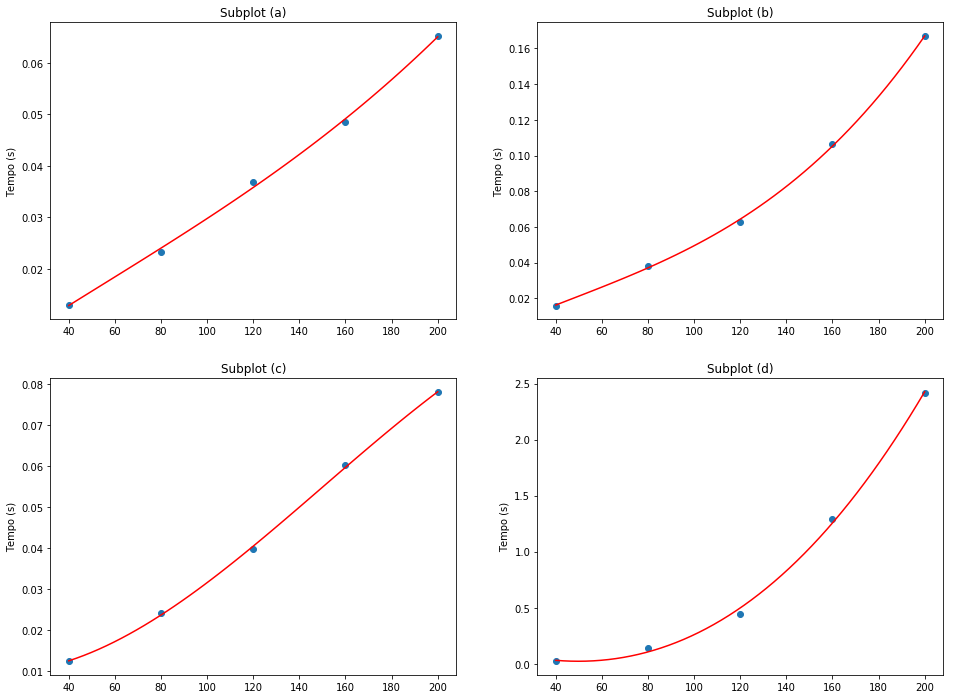

In [15]:
import matplotlib.pyplot as plt

f, axs = plt.subplots(2, 2, figsize=(16,12))
axs = [i for ax in axs for i in ax]
leg= ["(a)","(b)","(c)","(d)"]

for idx, ax in enumerate(axs):
    x = range(40, 201, 40)
    y = list(dados[idx].values)

    z = np.polyfit(x, y, 3)
    f = np.poly1d(z)

    x_new = np.linspace(x[0], x[-1], 50)
    y_new = f(x_new)

    ax.plot(x, y, 'o', x_new, y_new, 'r-')
    ax.set_title("Subplot " + leg[idx])
    ax.set_ylabel("Tempo (s)")
    
plt.show()

## H4

ValueError: cannot join with no level specified and no overlapping names

In [18]:
pd.concat(dados).mean()

/home/vtm/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


H4_gap          0.048039
H4_sol      36752.930000
H4_tempo        0.083137
gap             0.008235
sol         35414.258667
dtype: float64

In [33]:
arquivos = [a for a in os.listdir() if a[:8] == 'MIPbatch']
arquivos.sort()

dados = []
for arq in arquivos:
    df = pd.read_csv(arq, header=None, delimiter='-',  names=['n', 'I', 'F', 'J', 'R', 'gap', 'sol'])
    df = df.groupby(['I','F','J','R']).mean()[['gap', 'sol']]
    dados.append(df)


arquivos = [a for a in os.listdir() if a[:8] == 'H4_batch']
arquivos.sort()

for idx, arq in enumerate(arquivos):
    df = pd.read_csv(arq, header=None, delimiter='-',  names=['n', 'I', 'F', 'J', 'R', 'H4_sol', 'H4_tempo'])
    df = df.groupby(['I','F','J','R']).mean()[['H4_sol', 'H4_tempo']]
    dados[idx] = pd.concat([dados[idx], df], axis=1)
    dados[idx]['H4_gap'] = (dados[idx]['H4_sol'] - dados[idx]['sol'])/dados[idx]['sol']
    
pd.concat(dados)

/home/vtm/.local/lib/python3.6/site-packages/ipykernel_launcher.py:20: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



H4_gap    H4_sol  H4_tempo       gap           sol
I   F   J   R                                                        
40  30  30  2.0  0.066256  15616.20  0.031036  0.000000  14645.820000
80  30  30  2.0  0.048860  16034.72  0.050688  0.000000  15287.760000
120 30  30  2.0  0.077207  15899.30  0.080611  0.000000  14759.740000
160 30  30  2.0  0.078532  15380.02  0.112271  0.000000  14260.140000
200 30  30  2.0  0.054701  15058.90  0.148550  0.000000  14277.880000
30  40  30  2.0  0.042118  20815.48  0.039253  0.000000  19974.200000
    80  30  2.0  0.036793  36222.20  0.085736  0.000000  34936.760000
    120 30  2.0  0.038603  51680.90  0.155941  0.000000  49760.020000
    160 30  2.0  0.050761  68651.84  0.236194  0.000000  65335.340000
    200 30  2.0  0.059455  84388.82  0.342499  0.000452  79653.060000
    30  40  2.0  0.018295  16193.80  0.899137  0.000000  15902.860000
        80  2.0  0.026424  19922.66  1.881968  0.000000  19409.780000
        120 2.0  0.058190  23036.14  3.217580  0.000000  21769.380000
        160 2.0  0.065989  27511.02  5.108550  0.000000  25807.980000
        200 2.0  0.086018  29837.18  7.148070  0.000000  27473.920000
40  40  40  2.0  0.072535  21343.96  0.052497  0.000000  19900.480000
80  80  80  2.0  0.078457  39622.86  0.343735  0.000000  36740.340000
120 120 120 2.0  0.072245  57695.38  1.112190  0.000000  53808.020000
160 160 160 2.0  0.066311  74595.94  2.813532  0.000000  69957.040000
200 200 200 2.0  0.081306  97196.86  5.756860  0.000519  89888.380000
50  100 200 1.5       NaN       NaN       NaN  0.000000  68543.533333
            3.0       NaN       NaN       NaN  0.008753  36085.466667
            4.5       NaN       NaN       NaN  0.033474  28980.266667
            6.0       NaN       NaN       NaN  0.068538  25568.400000
            7.5       NaN       NaN       NaN  0.094127  22629.900000

In [28]:
pd.concat(dados).mean()

/home/vtm/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


H4_gap          0.075558
H4_sol      37568.226000
H4_tempo        0.595649
gap             0.008235
sol         35414.258667
dtype: float64